# Chapter 3
#### Setion 3.3. Concise Implementation of Linear Regression

In [3]:
%matplotlib inline
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

#### Generate a synthetic dataset

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    # Gaussian params
    mu = 0. 
    sigma = 1e-2
    # Design matrix R^(nxd) from Gaussing distribucion
    X = torch.normal(mu, sigma, (num_examples, len(w))) 
    # labels R^(n)
    y = torch.matmul(X, w) + b
    # Add Gaussing noise to the labels y = y + N(mu,sigma)
    y += torch.normal(mu, sigma, y.shape)
    #print(y)
    #print(y.reshape((-1, 1))) 
    # reshape((-1, 1)): We have provided column as 1 but rows as unknown, so
    # python figures out the other dimension
    return X, y.reshape((-1, 1)) 

# number of samples in de training dataset
n = 1000 # 1000
# true value of param w
# Implicity we are assuming an input vector with R^d, d = 2  
true_w = torch.tensor([2, -3.4])
# true value of param b
true_b = 4.2
# generate synthetica dataset using linear model and gaussian noise w/ mean = 0 & sigma=1e-2 en 
features, labels = synthetic_data(true_w, true_b, n)
# implemented in d2l lib
#features, labels = d2l.synthetic_data(true_w, true_b, 1000)
    

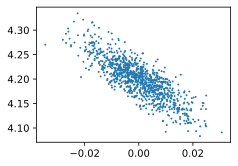

In [4]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

### 3.3.2. Reading the Dataset

In [6]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)        

In [7]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.0203, -0.0100],
         [ 0.0001,  0.0118],
         [ 0.0147,  0.0113],
         [-0.0072,  0.0098],
         [ 0.0128,  0.0202],
         [ 0.0068, -0.0073],
         [-0.0015,  0.0026],
         [ 0.0026, -0.0067],
         [-0.0154, -0.0103],
         [ 0.0115,  0.0077]]), tensor([[4.1867],
         [4.1613],
         [4.1968],
         [4.1437],
         [4.1622],
         [4.2437],
         [4.1958],
         [4.2364],
         [4.1959],
         [4.2040]])]

### 3.3.3.  Defining the Model & Initializing Model Parameters

In [9]:
'''
The Sequential class defines a container for several layers that will be chained 
together. Given input data, a Sequential instance passes it through the first layer,
in turn passing the output as the second layer’s input and so forth. In the 
following example, our model consists of only one layer, so we do not really 
need Sequential.
In PyTorch, the fully-connected layer is defined in the Linear class. Note
that we passed two arguments into nn.Linear. The first one specifies the
input feature dimension, which is 2, and the second one is the output feature
dimension, which is a single scalar and therefore 1.
'''
# `nn` is an abbreviation for neural networks
from torch import nn
# the input feature dimension (2) and the output feature dimension (1)
net = nn.Sequential(nn.Linear(2, 1))

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
# Instead of
#w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
#b = torch.zeros(1, requires_grad=True)

#def linreg(X, w, b):  #@save
#    """The linear regression model."""
#    return torch.matmul(X, w) + b

tensor([0.])

### 3.3.5. Defining the Loss Function

In [10]:
loss = nn.MSELoss()

#def squared_loss(y_hat, y):  #@save
#    """Squared loss."""
#    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 3.3.6. Defining the Optimization Algorithm

In [11]:
''' 
When we instantiate an SGD instance, we will specify the parameters to optimize 
over (obtainable from our net via net.parameters()), with a dictionary of 
hyperparameters required by our optimization algorithm. Minibatch stochastic
gradient descent requires the learning rate lr
'''

trainer = torch.optim.SGD(net.parameters(), lr=0.03)

#def sgd(params, lr, batch_size):  #@save
#    """Minibatch stochastic gradient descent."""
#    with torch.no_grad():
#        for param in params:
#            param -= lr * param.grad / batch_size
#            param.grad.zero_()

### 3.3.7. Training

In [13]:
'''
# Previous version
lr = 0.03
num_epochs = 3
# model's function name
net = linreg
# loss's function name
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
'''
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')
    


epoch 1, loss 0.001571
epoch 2, loss 0.001568
epoch 3, loss 0.001564


In [17]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)


error in estimating w: tensor([ 1.9945, -3.4036])
error in estimating b: tensor([4.2000])
